In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np


from IPython.display import Audio

In [2]:
import scipy
def fft_plot(audio, sampling_rate):
    n=len(audio)
    T=1/sampling_rate    
    yf=scipy.fft(audio)        
    xf=np.linspace(0.0, 1.0/(2.0*T), int(n/2))
    fig,ax = plt.subplots()
    ax.plot(xf,2.0/n*np.abs(yf[:n//2]))
    plt.grid()
    plt.xlabel("Frequency -->")
    plt.ylabel("Magnitude")
    return plt.show()

# C (low) Analysis

### Raw Recording

[0.03482993 0.95201814]
44100


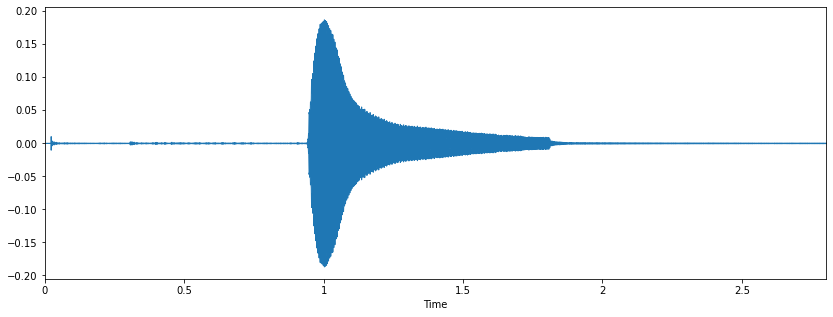

In [2]:
AUDIO_FILE = '/content/drive/MyDrive/Notes/C (low)/1648662030943.wav'
samples, sample_rate = librosa.load(AUDIO_FILE, sr=None)
print(librosa.onset.onset_detect(samples, sr=sample_rate, units='time'))
print(sample_rate)

plt.figure(figsize=(14, 5))
librosa.display.waveplot(samples, sr=sample_rate)

In [4]:
print(samples)
print(len(samples))
print(len(samples)/sample_rate)

[ 0.          0.          0.         ... -0.00024414 -0.00024414
 -0.00024414]
123626
2.8033106575963718


In [102]:
w = np.fft.fft(samples)
freqs = np.fft.fftfreq(len(w))
print(freqs.min(), freqs.max())
# (-0.5, 0.499975)

# Find the peak in the coefficients
idx = np.argmax(np.abs(w))
freq = freqs[idx]
freq_in_hertz = abs(freq * sample_rate)
print(freq_in_hertz)

-0.5 0.49999191108666463
261.8332713183311
0.028327229872021638


'f = freqs[med]\nhertz = abs(f*sample_rate)\nprint(f)'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  """


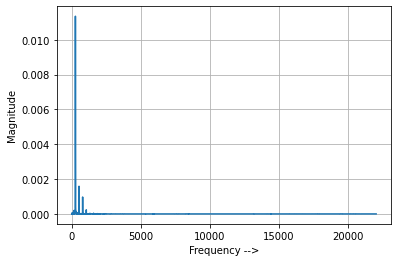

In [151]:
fft_plot(samples, sample_rate)

In [ ]:
print(librosa.onset.onset_detect(y=samples, sr=sample_rate, units='time'))
m = librosa.onset.onset_strength(y=samples, sr=sample_rate)
print(m.max())
times = librosa.times_like(m, sr=sample_rate)
print(type(m), type(times))
print(np.where(m==m.max()))
print(times[np.where(m==m.max())])

[0.03482993 0.95201814]
10.069126
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(array([3]),)
[0.03482993]


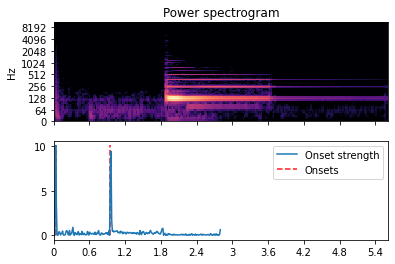

In [ ]:
import matplotlib.pyplot as plt
o_env = librosa.onset.onset_strength(y=samples, sr=sample_rate)
times = librosa.times_like(o_env, sr=sample_rate)
onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sample_rate)
D = np.abs(librosa.stft(samples))
fig, ax = plt.subplots(nrows=2, sharex=True)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                         x_axis='time', y_axis='log', ax=ax[0])
ax[0].set(title='Power spectrogram')
ax[0].label_outer()
ax[1].plot(times, o_env, label='Onset strength')
ax[1].vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9,
           linestyle='--', label='Onsets')
ax[1].legend()

##### Linear Spectrogram

[[2.8147146e-02 6.0037844e-02 3.1887960e-02 ... 1.0656236e-02
  1.5861411e-02 3.1144544e-04]
 [2.3656948e-03 3.6830749e-02 1.0396630e-01 ... 1.2528988e-02
  1.8900609e-02 1.1546708e-02]
 [3.2805622e-02 9.3745306e-02 3.0092603e-01 ... 1.8717643e-02
  1.7781148e-02 5.6498982e-03]
 ...
 [8.4555453e-05 1.2065129e-03 2.0777348e-03 ... 2.5797772e-04
  3.3414760e-04 1.6598885e-04]
 [8.1294987e-05 1.2737326e-03 2.2802842e-03 ... 3.5319492e-04
  4.4482472e-04 4.2751411e-04]
 [1.5134680e-05 1.2643996e-03 2.0405757e-03 ... 1.0569260e-04
  4.2050408e-04 7.9992705e-04]]


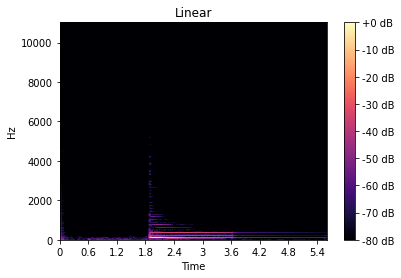

In [60]:
D = librosa.stft(samples)  # STFT of samples
#print(D)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
print(np.abs(D))
#print(S_db)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax)
ax.set(title='Linear')
fig.colorbar(img, ax=ax, format="%+2.f dB")

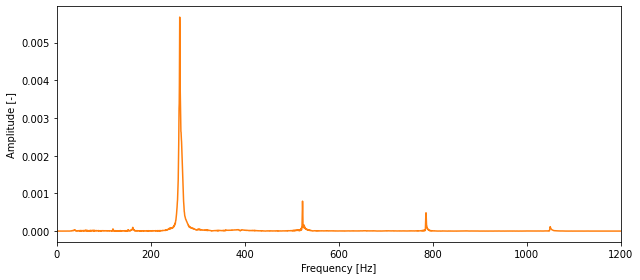

In [15]:
plt.figure(figsize=(9, 4))

plt.magnitude_spectrum(samples, Fs=sample_rate, color='C1', window=mlab.window_none)
plt.xlim(0, 1200)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [-]')
plt.tight_layout()
plt.show()

##### Log Scale Spectrogram

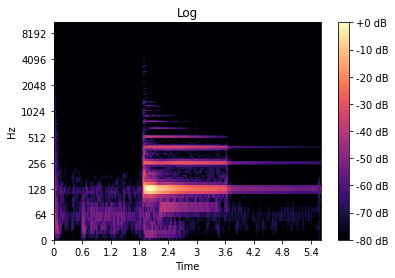

In [ ]:
D = librosa.stft(samples)  # STFT of samples
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
ax.set(title='Log')
fig.colorbar(img, ax=ax, format="%+2.f dB")

##### Mel Spectrogram

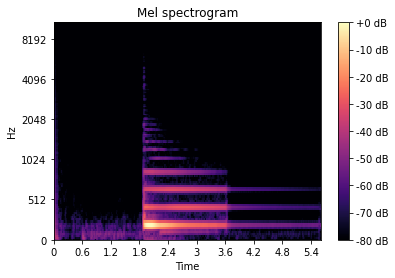

In [ ]:
fig, ax = plt.subplots()
M = librosa.feature.melspectrogram(y=samples, sr=sample_rate)
M_db = librosa.power_to_db(M, ref=np.max)
img = librosa.display.specshow(M_db, y_axis='mel', x_axis='time', ax=ax)
ax.set(title='Mel spectrogram')
fig.colorbar(img, ax=ax, format="%+2.f dB")

##### MFCCs Linear

(20, 242)


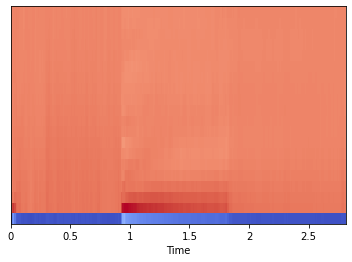

In [ ]:
mfccs = librosa.feature.mfcc(samples, sr=sample_rate)
print(mfccs.shape)
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

##### MFCCs Mel

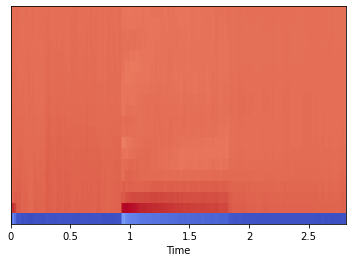

In [ ]:
mfccs2 = librosa.feature.mfcc(S=M_db)
librosa.display.specshow(mfccs2, sr=sample_rate, x_axis='time')

### Shorten Recording based on Decibels

[0.27863946 1.30031746 1.36997732]


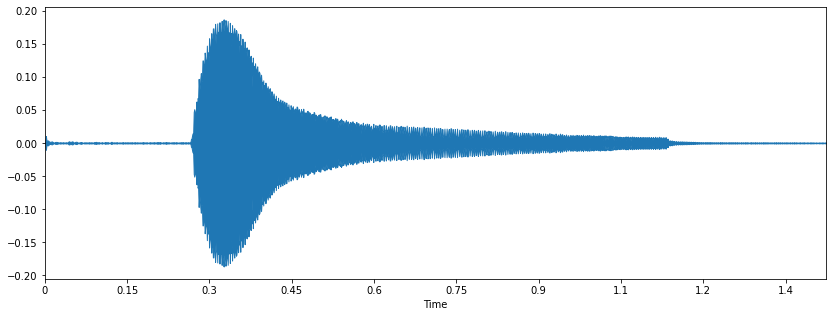

In [ ]:
clips = librosa.effects.split(samples, top_db=50, hop_length=64, frame_length=256)
#print(clips)
wav_data = []
for c in clips:
    #print(c)
    data = samples[c[0]: c[1]]
    wav_data.extend(data)
new_wav = arr = np.array(wav_data)
print(librosa.onset.onset_detect(new_wav, sr=sample_rate, units='time'))

plt.figure(figsize=(14, 5))
librosa.display.waveplot(new_wav, sr=sample_rate)

In [ ]:
print(librosa.onset.onset_detect(y=new_wav, sr=sample_rate, units='time'))
m = librosa.onset.onset_strength(y=new_wav, sr=sample_rate)
print(m.max())
times = librosa.times_like(m, sr=sample_rate)
print(type(m), type(times))
print(np.where(m==m.max()))
print(times[np.where(m==m.max())])

[0.27863946 1.30031746 1.36997732]
9.049264
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(array([24]),)
[0.27863946]


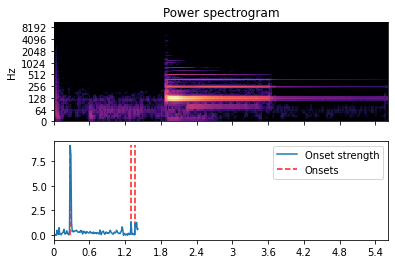

In [ ]:
import matplotlib.pyplot as plt
o_env = librosa.onset.onset_strength(new_wav, sr=sample_rate)
times = librosa.times_like(o_env, sr=sample_rate)
onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sample_rate)
D = np.abs(librosa.stft(samples))
fig, ax = plt.subplots(nrows=2, sharex=True)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                         x_axis='time', y_axis='log', ax=ax[0])
ax[0].set(title='Power spectrogram')
ax[0].label_outer()
ax[1].plot(times, o_env, label='Onset strength')
ax[1].vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9,
           linestyle='--', label='Onsets')
ax[1].legend()

##### Linear Spectrogram

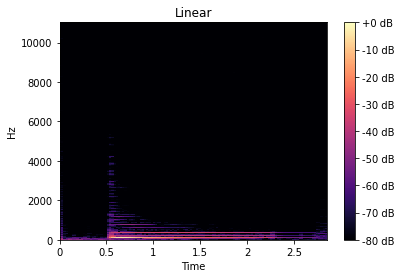

In [ ]:
D = librosa.stft(new_wav)  # STFT of samples
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax)
ax.set(title='Linear')
fig.colorbar(img, ax=ax, format="%+2.f dB")

##### Log Scale Spectrogram

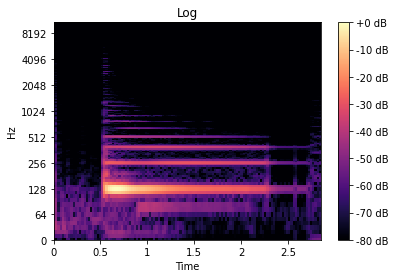

In [ ]:
D = librosa.stft(new_wav)  # STFT of samples
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
ax.set(title='Log')
fig.colorbar(img, ax=ax, format="%+2.f dB")

##### Mel Spectrogram

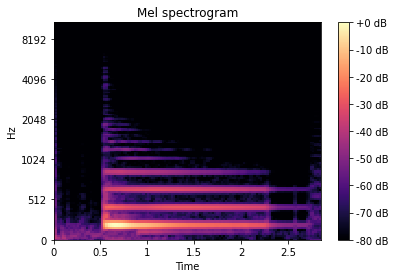

In [ ]:
fig, ax = plt.subplots()
M = librosa.feature.melspectrogram(y=new_wav, sr=sample_rate)
M_db = librosa.power_to_db(M, ref=np.max)
img = librosa.display.specshow(M_db, y_axis='mel', x_axis='time', ax=ax)
ax.set(title='Mel spectrogram')
fig.colorbar(img, ax=ax, format="%+2.f dB")

##### MFCCs Linear

(20, 123)


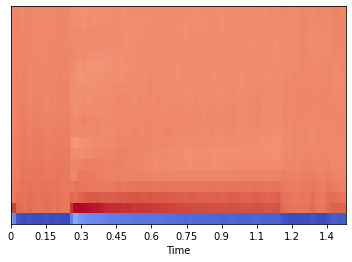

In [ ]:
mfccs = librosa.feature.mfcc(new_wav, sr=sample_rate)
print(mfccs.shape)
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

##### MFCCs Mel

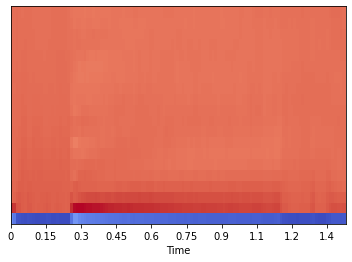

In [ ]:
mfccs2 = librosa.feature.mfcc(S=M_db)
librosa.display.specshow(mfccs2, sr=sample_rate, x_axis='time')

# D Analysis

### Raw Recording

[0.34829932 2.15945578 4.73687075]


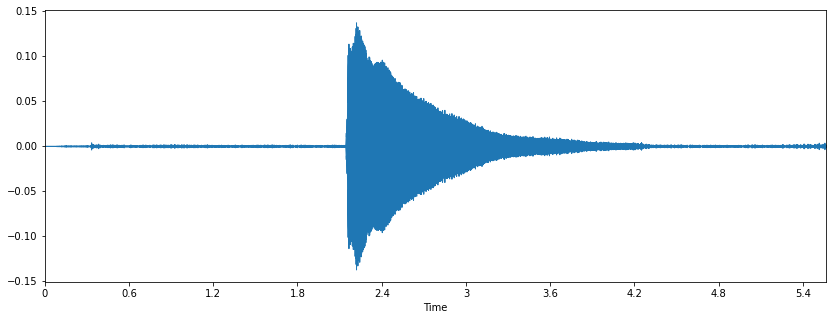

In [16]:
AUDIO_FILE = '/content/drive/MyDrive/Notes/D/1648661287401.wav'
samples, sample_rate = librosa.load(AUDIO_FILE, sr=None)
print(librosa.onset.onset_detect(samples, sr=sample_rate, units='time'))

plt.figure(figsize=(14, 5))
librosa.display.waveplot(samples, sr=sample_rate)

In [19]:
print(librosa.onset.onset_detect(y=samples, sr=sample_rate, units='time'))
m = librosa.onset.onset_strength(y=samples, sr=sample_rate)
print(m.max())
times = librosa.times_like(m, sr=sample_rate)
print(type(m), type(times))
print(np.where(m==m.max()))
print(times[np.where(m==m.max())])

[0.34829932 2.15945578 4.73687075]
16.396448
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(array([186]),)
[2.15945578]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  """


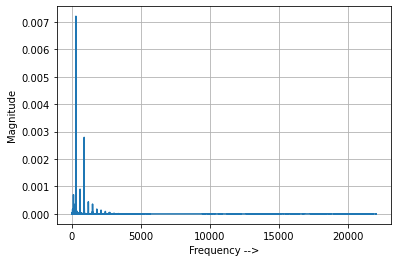

In [4]:
fft_plot(samples, sample_rate)

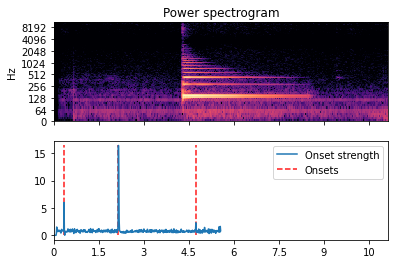

In [18]:
import matplotlib.pyplot as plt
o_env = librosa.onset.onset_strength(y=samples, sr=sample_rate)
times = librosa.times_like(o_env, sr=sample_rate)
onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sample_rate)
D = np.abs(librosa.stft(samples))
fig, ax = plt.subplots(nrows=2, sharex=True)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                         x_axis='time', y_axis='log', ax=ax[0])
ax[0].set(title='Power spectrogram')
ax[0].label_outer()
ax[1].plot(times, o_env, label='Onset strength')
ax[1].vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9,
           linestyle='--', label='Onsets')
ax[1].legend()

##### Linear Spectrogram

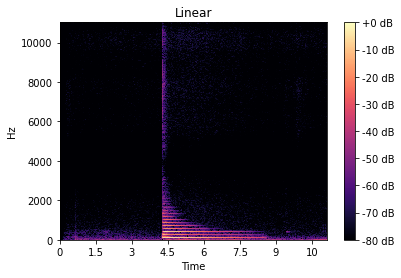

In [17]:
D = librosa.stft(samples)  # STFT of samples
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax)
ax.set(title='Linear')
fig.colorbar(img, ax=ax, format="%+2.f dB")

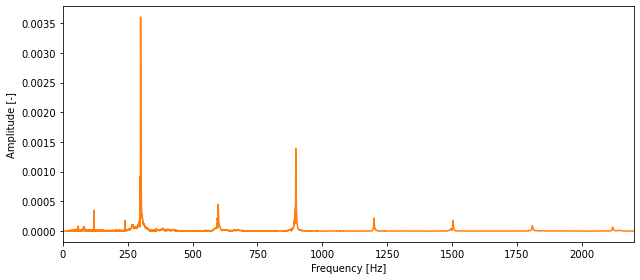

In [20]:
plt.figure(figsize=(9, 4))

plt.magnitude_spectrum(samples, Fs=sample_rate, color='C1', window=mlab.window_none)
plt.xlim(0, 2200)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [-]')
plt.tight_layout()
plt.show()

##### Log Scale Spectrogram

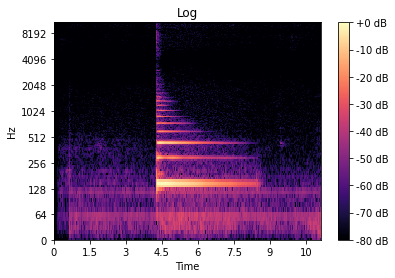

In [ ]:
D = librosa.stft(samples)  # STFT of samples
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
ax.set(title='Log')
fig.colorbar(img, ax=ax, format="%+2.f dB")

##### Mel Spectrogram

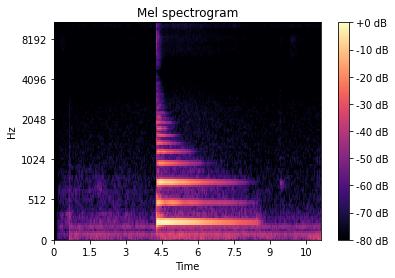

In [ ]:
fig, ax = plt.subplots()
M = librosa.feature.melspectrogram(y=samples, sr=sample_rate)
M_db = librosa.power_to_db(M, ref=np.max)
img = librosa.display.specshow(M_db, y_axis='mel', x_axis='time', ax=ax)
ax.set(title='Mel spectrogram')
fig.colorbar(img, ax=ax, format="%+2.f dB")

##### MFCCs Linear

(20, 480)


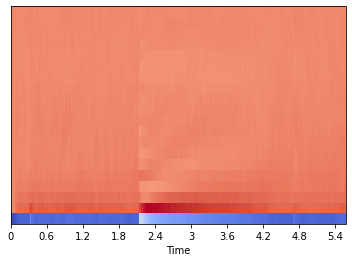

In [ ]:
mfccs = librosa.feature.mfcc(samples, sr=sample_rate)
print(mfccs.shape)
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

##### MFCCs Mel

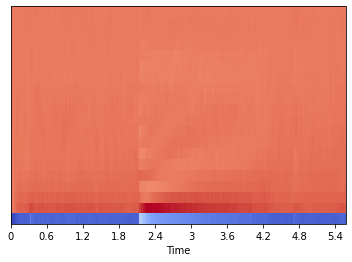

In [ ]:
mfccs2 = librosa.feature.mfcc(S=M_db)
librosa.display.specshow(mfccs2, sr=sample_rate, x_axis='time')

### Shorten Recording based on Decibels

[0.15092971 1.96208617]


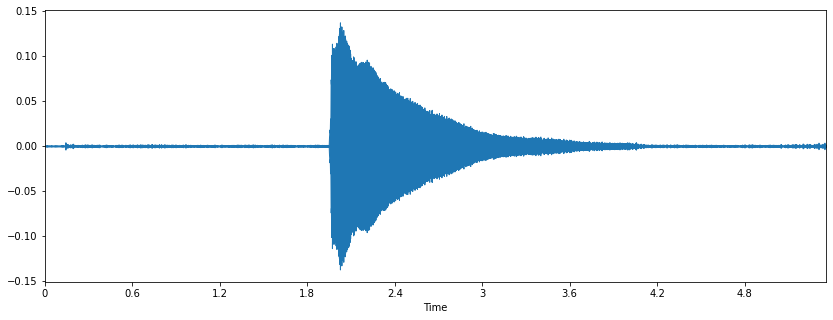

In [ ]:
clips = librosa.effects.split(samples, top_db=50, hop_length=64, frame_length=256)
#print(clips)
wav_data = []
for c in clips:
    #print(c)
    data = samples[c[0]: c[1]]
    wav_data.extend(data)
new_wav = arr = np.array(wav_data)
print(librosa.onset.onset_detect(new_wav, sr=sample_rate, units='time'))

plt.figure(figsize=(14, 5))
librosa.display.waveplot(new_wav, sr=sample_rate)

##### Linear Spectrogram

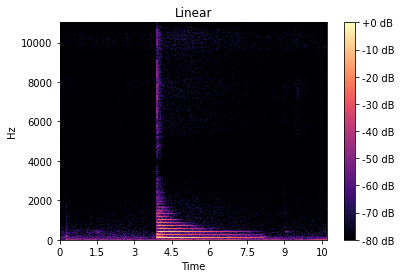

In [ ]:
D = librosa.stft(new_wav)  # STFT of samples
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax)
ax.set(title='Linear')
fig.colorbar(img, ax=ax, format="%+2.f dB")

##### Log Scale Spectrogram

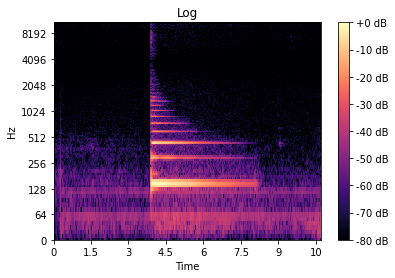

In [ ]:
D = librosa.stft(new_wav)  # STFT of samples
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
ax.set(title='Log')
fig.colorbar(img, ax=ax, format="%+2.f dB")

##### Mel Spectrogram

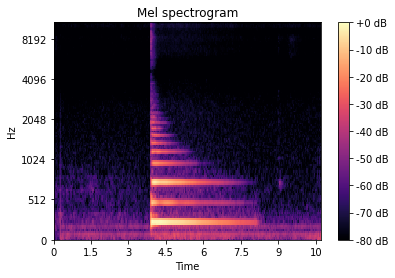

In [ ]:
fig, ax = plt.subplots()
M = librosa.feature.melspectrogram(y=new_wav, sr=sample_rate)
M_db = librosa.power_to_db(M, ref=np.max)
img = librosa.display.specshow(M_db, y_axis='mel', x_axis='time', ax=ax)
ax.set(title='Mel spectrogram')
fig.colorbar(img, ax=ax, format="%+2.f dB")

##### MFCCs Linear

(20, 462)


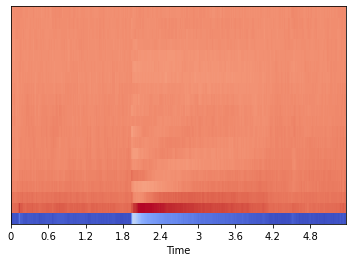

In [ ]:
mfccs = librosa.feature.mfcc(new_wav, sr=sample_rate)
print(mfccs.shape)
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

##### MFCCs Mel

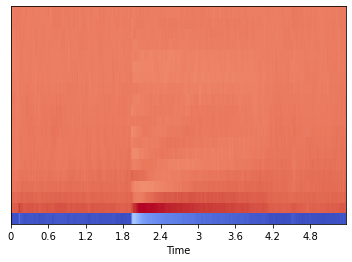

In [ ]:
mfccs2 = librosa.feature.mfcc(S=M_db)
librosa.display.specshow(mfccs2, sr=sample_rate, x_axis='time')

# E Analysis

### Raw Recording

[0.33668934 1.20743764 3.1230839 ]


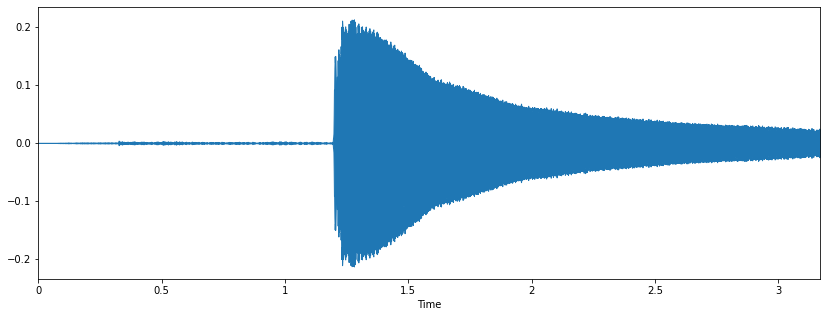

In [21]:
AUDIO_FILE = '/content/drive/MyDrive/Notes/E/1648661518204.wav'
samples, sample_rate = librosa.load(AUDIO_FILE, sr=None)
print(librosa.onset.onset_detect(samples, sr=sample_rate, units='time'))

plt.figure(figsize=(14, 5))
librosa.display.waveplot(samples, sr=sample_rate)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  """


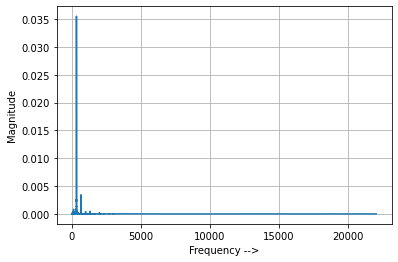

In [6]:
fft_plot(samples, sample_rate)

##### Linear Spectrogram

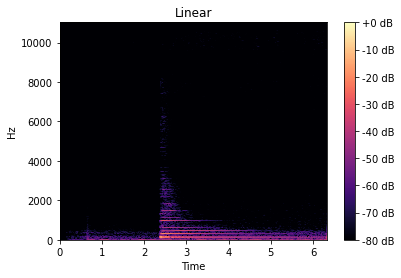

In [22]:
D = librosa.stft(samples)  # STFT of samples
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax)
ax.set(title='Linear')
fig.colorbar(img, ax=ax, format="%+2.f dB")

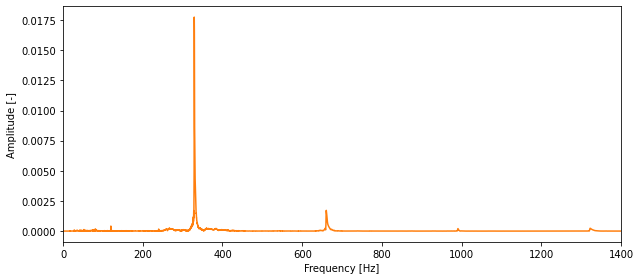

In [25]:
plt.figure(figsize=(9, 4))

plt.magnitude_spectrum(samples, Fs=sample_rate, color='C1', window=mlab.window_none)
plt.xlim(0, 1400)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [-]')
plt.tight_layout()
plt.show()

##### Log Scale Spectrogram

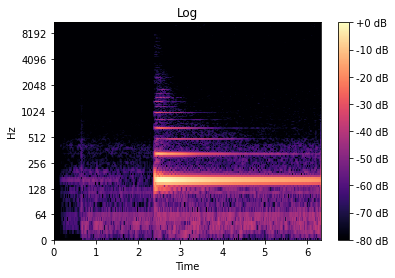

In [ ]:
D = librosa.stft(samples)  # STFT of samples
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
ax.set(title='Log')
fig.colorbar(img, ax=ax, format="%+2.f dB")

##### Mel Spectrogram

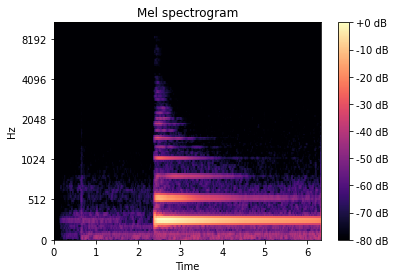

In [ ]:
fig, ax = plt.subplots()
M = librosa.feature.melspectrogram(y=samples, sr=sample_rate)
M_db = librosa.power_to_db(M, ref=np.max)
img = librosa.display.specshow(M_db, y_axis='mel', x_axis='time', ax=ax)
ax.set(title='Mel spectrogram')
fig.colorbar(img, ax=ax, format="%+2.f dB")

##### MFCCs Linear

(20, 273)


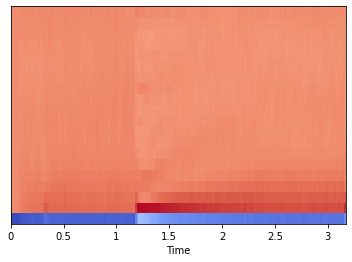

In [ ]:
mfccs = librosa.feature.mfcc(samples, sr=sample_rate)
print(mfccs.shape)
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

##### MFCCs Mel

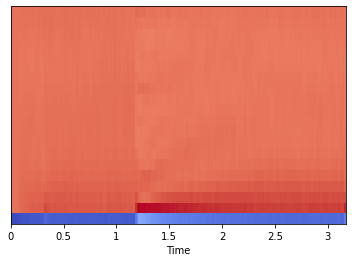

In [ ]:
mfccs2 = librosa.feature.mfcc(S=M_db)
librosa.display.specshow(mfccs2, sr=sample_rate, x_axis='time')

### Shorten Recording based on Decibels

[0.06965986 0.8707483  2.78639456]


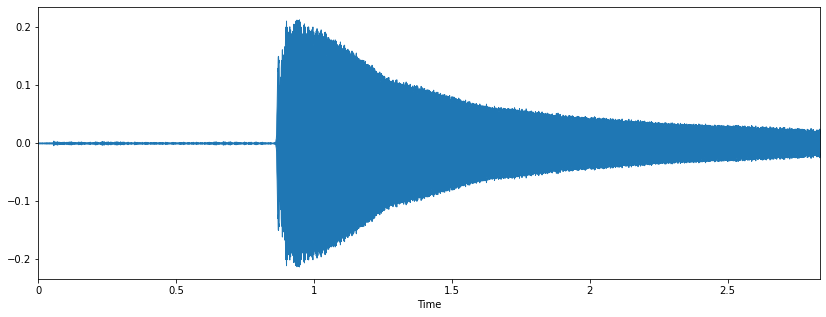

In [ ]:
clips = librosa.effects.split(samples, top_db=50, hop_length=64, frame_length=256)
#print(clips)
wav_data = []
for c in clips:
    #print(c)
    data = samples[c[0]: c[1]]
    wav_data.extend(data)
new_wav = arr = np.array(wav_data)
print(librosa.onset.onset_detect(new_wav, sr=sample_rate, units='time'))

plt.figure(figsize=(14, 5))
librosa.display.waveplot(new_wav, sr=sample_rate)

##### Linear Spectrogram

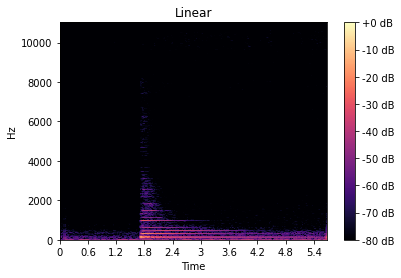

In [ ]:
D = librosa.stft(new_wav)  # STFT of samples
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax)
ax.set(title='Linear')
fig.colorbar(img, ax=ax, format="%+2.f dB")

##### Log Scale Spectrogram

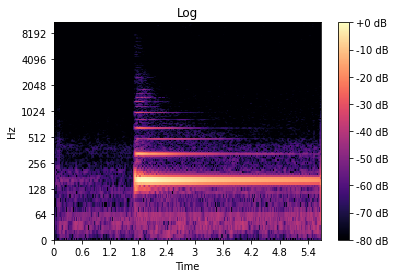

In [ ]:
D = librosa.stft(new_wav)  # STFT of samples
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
ax.set(title='Log')
fig.colorbar(img, ax=ax, format="%+2.f dB")

##### Mel Spectrogram

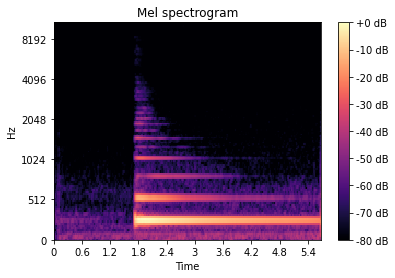

In [ ]:
fig, ax = plt.subplots()
M = librosa.feature.melspectrogram(y=new_wav, sr=sample_rate)
M_db = librosa.power_to_db(M, ref=np.max)
img = librosa.display.specshow(M_db, y_axis='mel', x_axis='time', ax=ax)
ax.set(title='Mel spectrogram')
fig.colorbar(img, ax=ax, format="%+2.f dB")

##### MFCCs Linear

(20, 245)


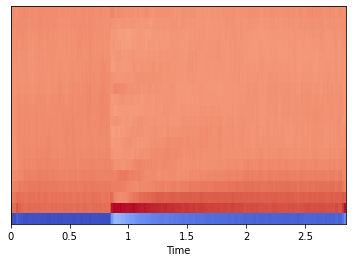

In [ ]:
mfccs = librosa.feature.mfcc(new_wav, sr=sample_rate)
print(mfccs.shape)
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

##### MFCCs Mel

# F Analysis

### Raw Recording

[0.03482993 1.18421769 1.67183673 3.26240363 3.7384127 ]


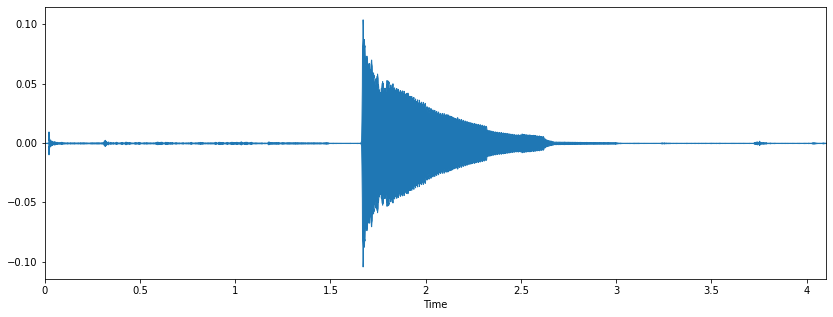

In [26]:
AUDIO_FILE = '/content/drive/MyDrive/Notes/F/1648662299106.wav'
samples, sample_rate = librosa.load(AUDIO_FILE, sr=None)
print(librosa.onset.onset_detect(samples, sr=sample_rate, units='time'))

plt.figure(figsize=(14, 5))
librosa.display.waveplot(samples, sr=sample_rate)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  """


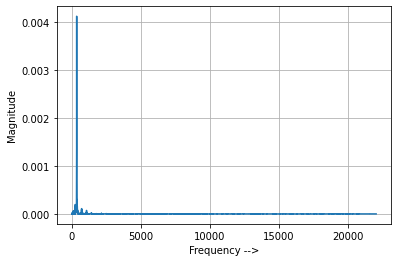

In [8]:
fft_plot(samples, sample_rate)

##### Linear Spectrogram

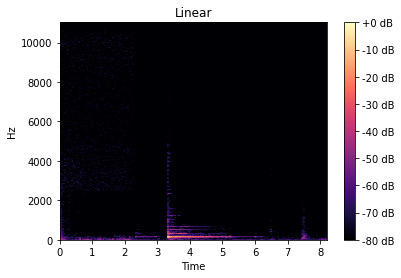

In [27]:
D = librosa.stft(samples)  # STFT of samples
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax)
ax.set(title='Linear')
fig.colorbar(img, ax=ax, format="%+2.f dB")

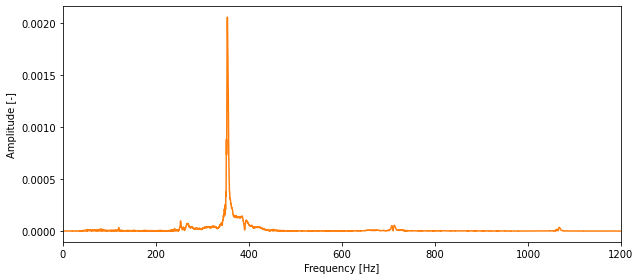

In [29]:
plt.figure(figsize=(9, 4))

plt.magnitude_spectrum(samples, Fs=sample_rate, color='C1', window=mlab.window_none)
plt.xlim(0, 1200)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [-]')
plt.tight_layout()
plt.show()

##### Log Scale Spectrogram

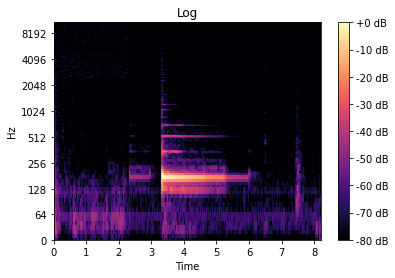

In [ ]:
D = librosa.stft(samples)  # STFT of samples
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
ax.set(title='Log')
fig.colorbar(img, ax=ax, format="%+2.f dB")

##### Mel Spectrogram

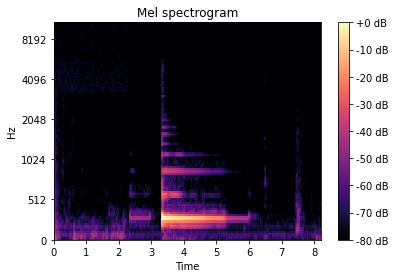

In [ ]:
fig, ax = plt.subplots()
M = librosa.feature.melspectrogram(y=samples, sr=sample_rate)
M_db = librosa.power_to_db(M, ref=np.max)
img = librosa.display.specshow(M_db, y_axis='mel', x_axis='time', ax=ax)
ax.set(title='Mel spectrogram')
fig.colorbar(img, ax=ax, format="%+2.f dB")

##### MFCCs Linear

(20, 354)


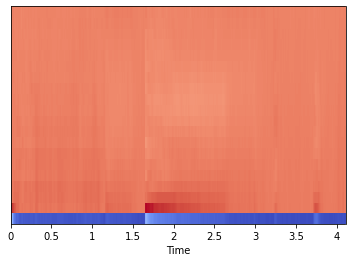

In [ ]:
mfccs = librosa.feature.mfcc(samples, sr=sample_rate)
print(mfccs.shape)
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

##### MFCCs Mel

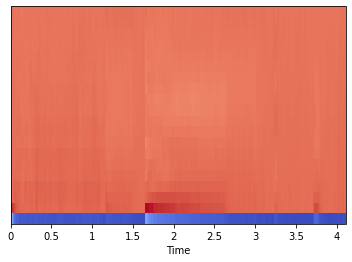

In [ ]:
mfccs2 = librosa.feature.mfcc(S=M_db)
librosa.display.specshow(mfccs2, sr=sample_rate, x_axis='time')

### Shorten Recording based on Decibels

[0.90557823 2.2523356 ]


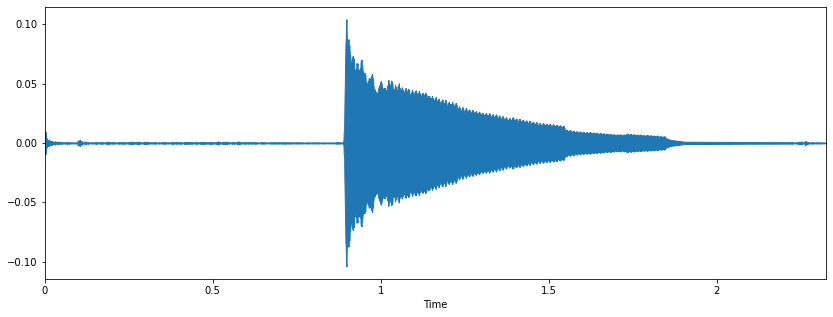

In [ ]:
clips = librosa.effects.split(samples, top_db=50, hop_length=64, frame_length=256)
#print(clips)
wav_data = []
for c in clips:
    #print(c)
    data = samples[c[0]: c[1]]
    wav_data.extend(data)
new_wav = arr = np.array(wav_data)
print(librosa.onset.onset_detect(new_wav, sr=sample_rate, units='time'))

plt.figure(figsize=(14, 5))
librosa.display.waveplot(new_wav, sr=sample_rate)

##### Linear Spectrogram

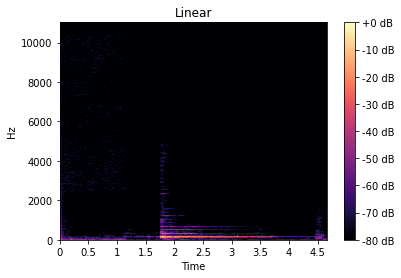

In [ ]:
D = librosa.stft(new_wav)  # STFT of samples
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax)
ax.set(title='Linear')
fig.colorbar(img, ax=ax, format="%+2.f dB")

##### Log Scale Spectrogram

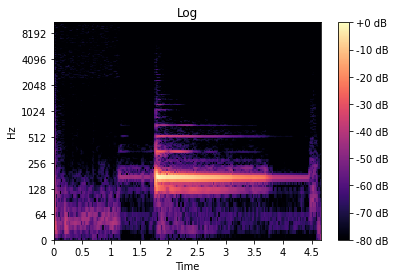

In [ ]:
D = librosa.stft(new_wav)  # STFT of samples
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
ax.set(title='Log')
fig.colorbar(img, ax=ax, format="%+2.f dB")

##### Mel Spectrogram

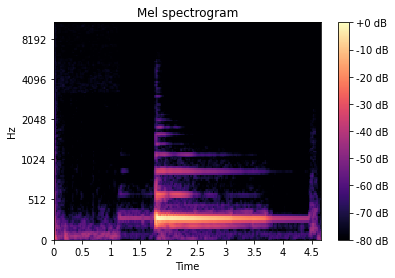

In [ ]:
fig, ax = plt.subplots()
M = librosa.feature.melspectrogram(y=new_wav, sr=sample_rate)
M_db = librosa.power_to_db(M, ref=np.max)
img = librosa.display.specshow(M_db, y_axis='mel', x_axis='time', ax=ax)
ax.set(title='Mel spectrogram')
fig.colorbar(img, ax=ax, format="%+2.f dB")

##### MFCCs Linear

(20, 201)


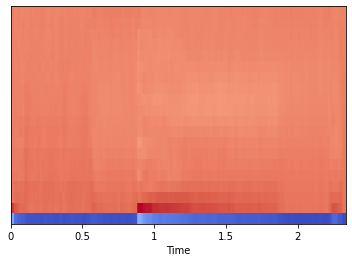

In [ ]:
mfccs = librosa.feature.mfcc(new_wav, sr=sample_rate)
print(mfccs.shape)
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

##### MFCCs Mel

# G Analysis

### Raw Recording

[0.03482993 0.77786848]


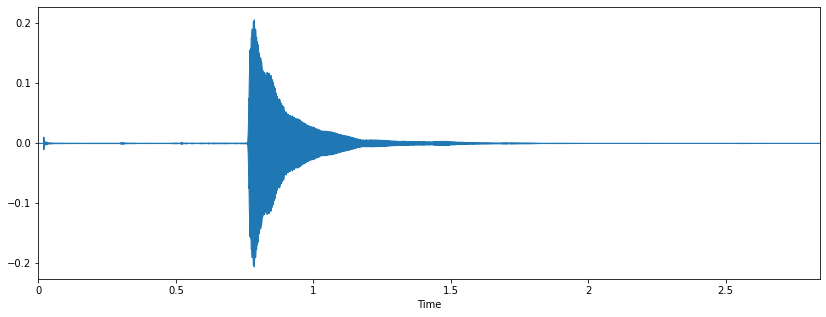

In [30]:
AUDIO_FILE = '/content/drive/MyDrive/Notes/G/1648421459595.wav'
samples, sample_rate = librosa.load(AUDIO_FILE, sr=None)
print(librosa.onset.onset_detect(samples, sr=sample_rate, units='time'))

plt.figure(figsize=(14, 5))
librosa.display.waveplot(samples, sr=sample_rate)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  """


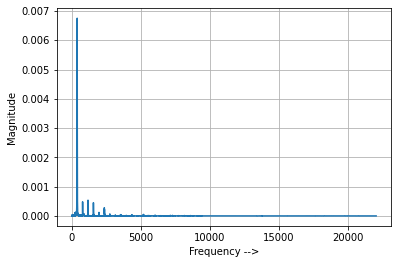

In [10]:
fft_plot(samples, sample_rate)

##### Linear Spectrogram

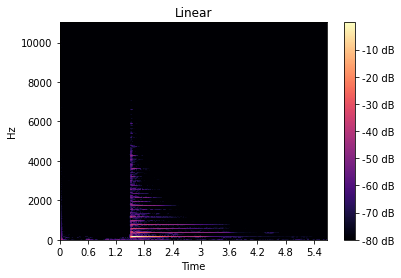

In [31]:
D = librosa.stft(samples)  # STFT of samples
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax)
ax.set(title='Linear')
fig.colorbar(img, ax=ax, format="%+2.f dB")

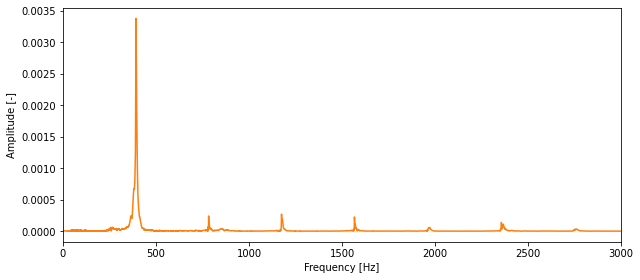

In [33]:
plt.figure(figsize=(9, 4))

plt.magnitude_spectrum(samples, Fs=sample_rate, color='C1', window=mlab.window_none)
plt.xlim(0, 3000)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [-]')
plt.tight_layout()
plt.show()

##### Log Scale Spectrogram

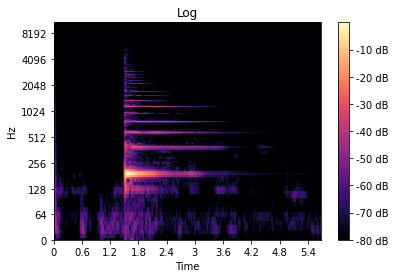

In [ ]:
D = librosa.stft(samples)  # STFT of samples
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
ax.set(title='Log')
fig.colorbar(img, ax=ax, format="%+2.f dB")

##### Mel Spectrogram

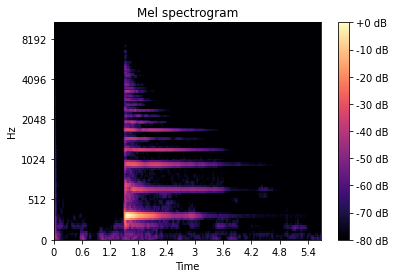

In [ ]:
fig, ax = plt.subplots()
M = librosa.feature.melspectrogram(y=samples, sr=sample_rate)
M_db = librosa.power_to_db(M, ref=np.max)
img = librosa.display.specshow(M_db, y_axis='mel', x_axis='time', ax=ax)
ax.set(title='Mel spectrogram')
fig.colorbar(img, ax=ax, format="%+2.f dB")

##### MFCCs Linear

(20, 245)


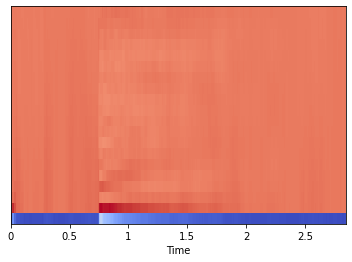

In [ ]:
mfccs = librosa.feature.mfcc(samples, sr=sample_rate)
print(mfccs.shape)
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

##### MFCCs Mel

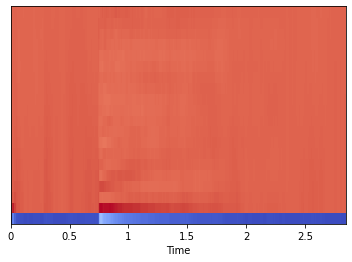

In [ ]:
mfccs2 = librosa.feature.mfcc(S=M_db)
librosa.display.specshow(mfccs2, sr=sample_rate, x_axis='time')

### Shorten Recording based on Decibels

[0.08126984 0.9752381 ]


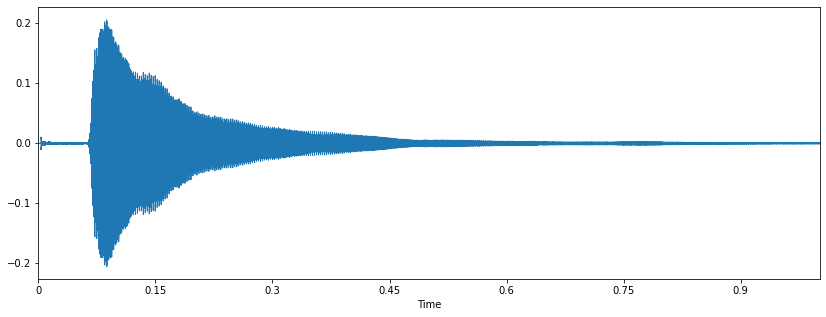

In [ ]:
clips = librosa.effects.split(samples, top_db=50, hop_length=64, frame_length=256)
#print(clips)
wav_data = []
for c in clips:
    #print(c)
    data = samples[c[0]: c[1]]
    wav_data.extend(data)
new_wav = arr = np.array(wav_data)
print(librosa.onset.onset_detect(new_wav, sr=sample_rate, units='time'))

plt.figure(figsize=(14, 5))
librosa.display.waveplot(new_wav, sr=sample_rate)

##### Linear Spectrogram

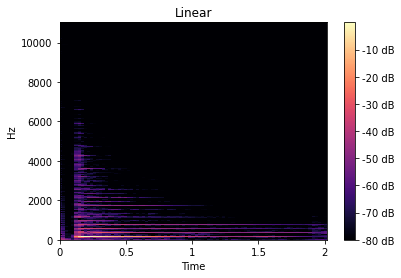

In [ ]:
D = librosa.stft(new_wav)  # STFT of samples
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax)
ax.set(title='Linear')
fig.colorbar(img, ax=ax, format="%+2.f dB")

##### Log Scale Spectrogram

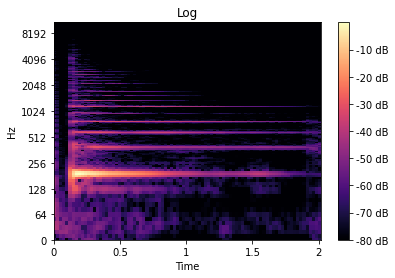

In [ ]:
D = librosa.stft(new_wav)  # STFT of samples
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
ax.set(title='Log')
fig.colorbar(img, ax=ax, format="%+2.f dB")

##### Mel Spectrogram

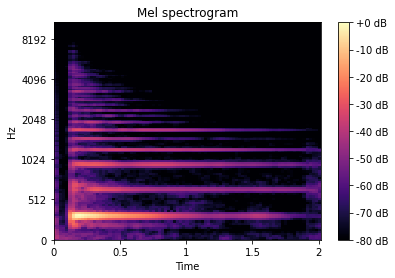

In [ ]:
fig, ax = plt.subplots()
M = librosa.feature.melspectrogram(y=new_wav, sr=sample_rate)
M_db = librosa.power_to_db(M, ref=np.max)
img = librosa.display.specshow(M_db, y_axis='mel', x_axis='time', ax=ax)
ax.set(title='Mel spectrogram')
fig.colorbar(img, ax=ax, format="%+2.f dB")

##### MFCCs Linear

(20, 87)


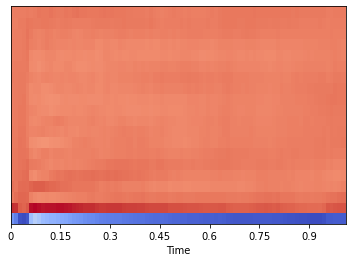

In [ ]:
mfccs = librosa.feature.mfcc(new_wav, sr=sample_rate)
print(mfccs.shape)
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

##### MFCCs Mel

# A Analysis

### Raw Recording

[0.33668934 0.99845805 3.1230839 ]


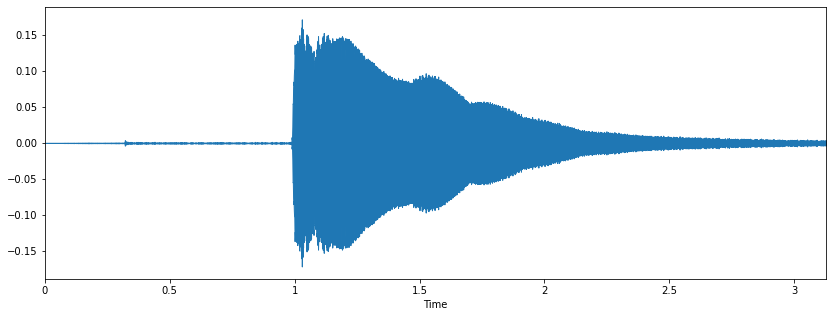

In [34]:
AUDIO_FILE = '/content/drive/MyDrive/Notes/A/1648661789614.wav'
samples, sample_rate = librosa.load(AUDIO_FILE, sr=None)
print(librosa.onset.onset_detect(samples, sr=sample_rate, units='time'))

plt.figure(figsize=(14, 5))
librosa.display.waveplot(samples, sr=sample_rate)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  """


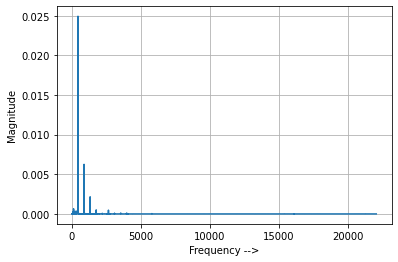

In [12]:
fft_plot(samples, sample_rate)

##### Linear Spectrogram

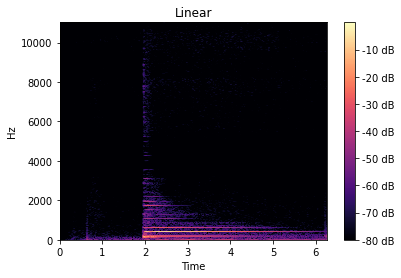

In [35]:
D = librosa.stft(samples)  # STFT of samples
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax)
ax.set(title='Linear')
fig.colorbar(img, ax=ax, format="%+2.f dB")

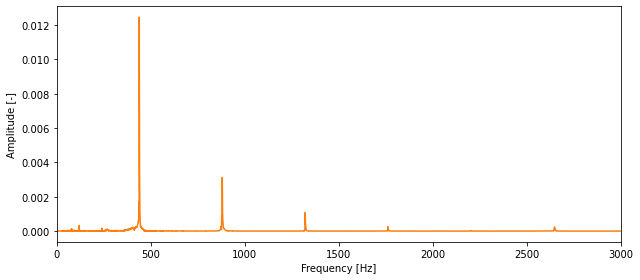

In [38]:
plt.figure(figsize=(9, 4))

plt.magnitude_spectrum(samples, Fs=sample_rate, color='C1', window=mlab.window_none)
plt.xlim(0, 3000)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [-]')
plt.tight_layout()
plt.show()

##### Log Scale Spectrogram

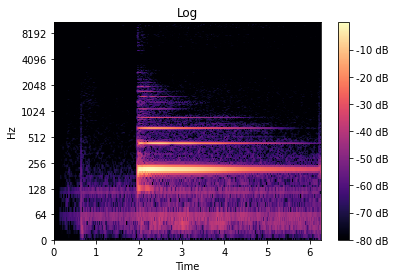

In [ ]:
D = librosa.stft(samples)  # STFT of samples
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
ax.set(title='Log')
fig.colorbar(img, ax=ax, format="%+2.f dB")

##### Mel Spectrogram

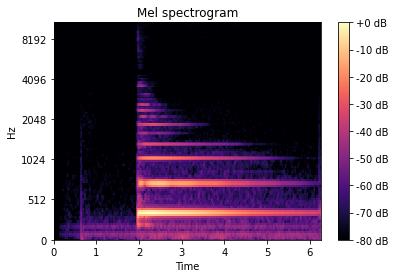

In [ ]:
fig, ax = plt.subplots()
M = librosa.feature.melspectrogram(y=samples, sr=sample_rate)
M_db = librosa.power_to_db(M, ref=np.max)
img = librosa.display.specshow(M_db, y_axis='mel', x_axis='time', ax=ax)
ax.set(title='Mel spectrogram')
fig.colorbar(img, ax=ax, format="%+2.f dB")

##### MFCCs Linear

(20, 270)


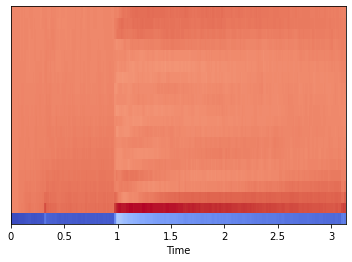

In [ ]:
mfccs = librosa.feature.mfcc(samples, sr=sample_rate)
print(mfccs.shape)
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

##### MFCCs Mel

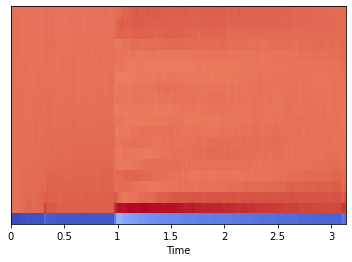

In [ ]:
mfccs2 = librosa.feature.mfcc(S=M_db)
librosa.display.specshow(mfccs2, sr=sample_rate, x_axis='time')

### Shorten Recording based on Decibels

[0.60371882 2.72834467]


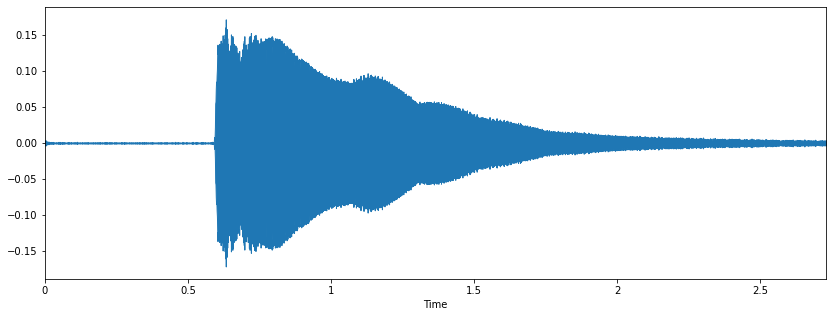

In [ ]:
clips = librosa.effects.split(samples, top_db=50, hop_length=64, frame_length=256)
#print(clips)
wav_data = []
for c in clips:
    #print(c)
    data = samples[c[0]: c[1]]
    wav_data.extend(data)
new_wav = arr = np.array(wav_data)
print(librosa.onset.onset_detect(new_wav, sr=sample_rate, units='time'))

plt.figure(figsize=(14, 5))
librosa.display.waveplot(new_wav, sr=sample_rate)

##### Linear Spectrogram

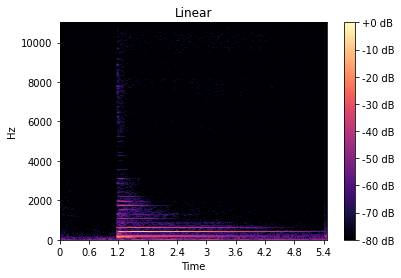

In [ ]:
D = librosa.stft(new_wav)  # STFT of samples
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax)
ax.set(title='Linear')
fig.colorbar(img, ax=ax, format="%+2.f dB")

##### Log Scale Spectrogram

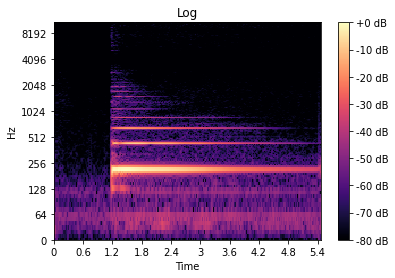

In [ ]:
D = librosa.stft(new_wav)  # STFT of samples
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
ax.set(title='Log')
fig.colorbar(img, ax=ax, format="%+2.f dB")

##### Mel Spectrogram

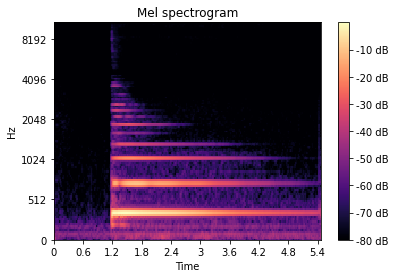

In [ ]:
fig, ax = plt.subplots()
M = librosa.feature.melspectrogram(y=new_wav, sr=sample_rate)
M_db = librosa.power_to_db(M, ref=np.max)
img = librosa.display.specshow(M_db, y_axis='mel', x_axis='time', ax=ax)
ax.set(title='Mel spectrogram')
fig.colorbar(img, ax=ax, format="%+2.f dB")

##### MFCCs Linear

(20, 236)


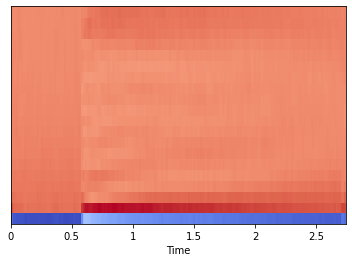

In [ ]:
mfccs = librosa.feature.mfcc(new_wav, sr=sample_rate)
print(mfccs.shape)
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

##### MFCCs Mel

# B Analysis

### Raw Recording

[0.09287982 0.33668934 1.97369615]


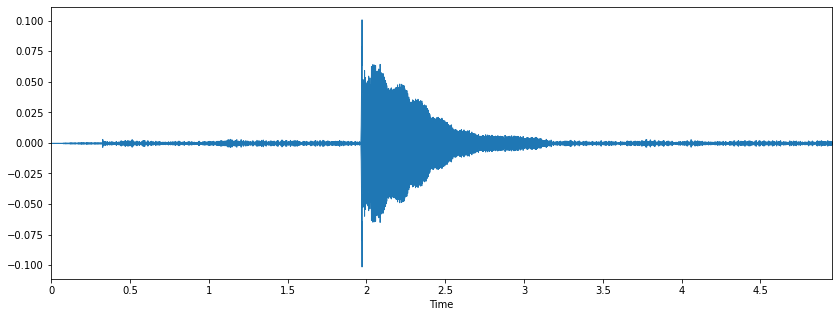

In [39]:
AUDIO_FILE = '/content/drive/MyDrive/Notes/B/1648661854199.wav'
samples, sample_rate = librosa.load(AUDIO_FILE, sr=None)
print(librosa.onset.onset_detect(samples, sr=sample_rate, units='time'))

plt.figure(figsize=(14, 5))
librosa.display.waveplot(samples, sr=sample_rate)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  """


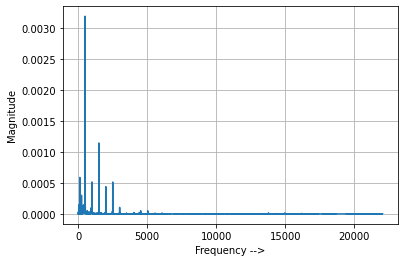

In [14]:
fft_plot(samples, sample_rate)

##### Linear Spectrogram

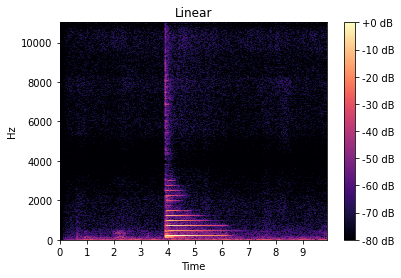

In [40]:
D = librosa.stft(samples)  # STFT of samples
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax)
ax.set(title='Linear')
fig.colorbar(img, ax=ax, format="%+2.f dB")

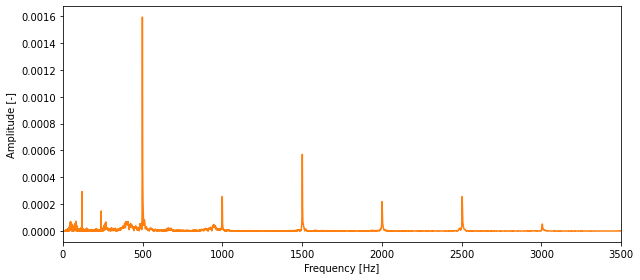

In [44]:
plt.figure(figsize=(9, 4))

plt.magnitude_spectrum(samples, Fs=sample_rate, color='C1', window=mlab.window_none)
plt.xlim(0, 3500)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [-]')
plt.tight_layout()
plt.show()

In [46]:
Audio(AUDIO_FILE)

##### Log Scale Spectrogram

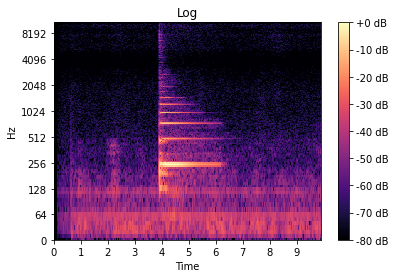

In [ ]:
D = librosa.stft(samples)  # STFT of samples
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
ax.set(title='Log')
fig.colorbar(img, ax=ax, format="%+2.f dB")

##### Mel Spectrogram

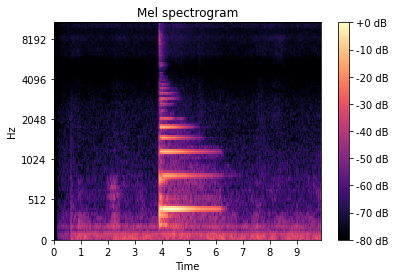

In [ ]:
fig, ax = plt.subplots()
M = librosa.feature.melspectrogram(y=samples, sr=sample_rate)
M_db = librosa.power_to_db(M, ref=np.max)
img = librosa.display.specshow(M_db, y_axis='mel', x_axis='time', ax=ax)
ax.set(title='Mel spectrogram')
fig.colorbar(img, ax=ax, format="%+2.f dB")

##### MFCCs Linear

(20, 427)


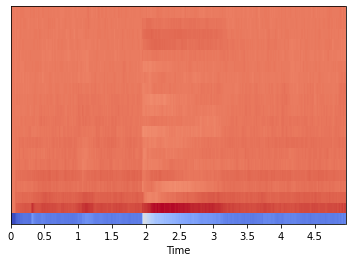

In [ ]:
mfccs = librosa.feature.mfcc(samples, sr=sample_rate)
print(mfccs.shape)
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

##### MFCCs Mel

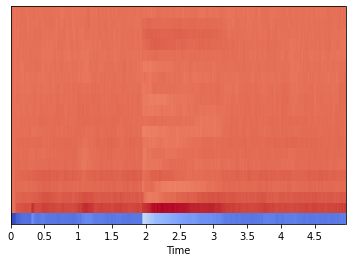

In [ ]:
mfccs2 = librosa.feature.mfcc(S=M_db)
librosa.display.specshow(mfccs2, sr=sample_rate, x_axis='time')

### Shorten Recording based on Decibels

[0.22058957 1.84598639]


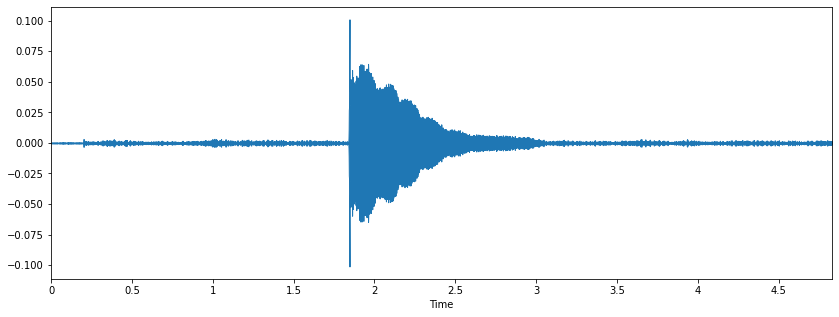

In [ ]:
clips = librosa.effects.split(samples, top_db=50, hop_length=64, frame_length=256)
#print(clips)
wav_data = []
for c in clips:
    #print(c)
    data = samples[c[0]: c[1]]
    wav_data.extend(data)
new_wav = arr = np.array(wav_data)
print(librosa.onset.onset_detect(new_wav, sr=sample_rate, units='time'))

plt.figure(figsize=(14, 5))
librosa.display.waveplot(new_wav, sr=sample_rate)

##### Linear Spectrogram

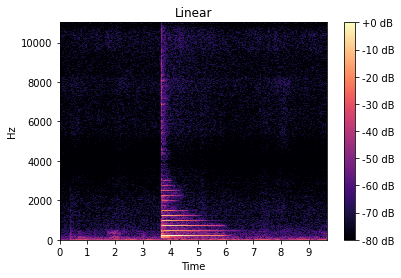

In [ ]:
D = librosa.stft(new_wav)  # STFT of samples
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax)
ax.set(title='Linear')
fig.colorbar(img, ax=ax, format="%+2.f dB")

##### Log Scale Spectrogram

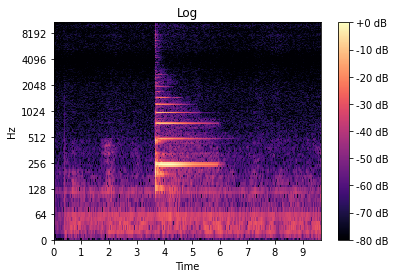

In [ ]:
D = librosa.stft(new_wav)  # STFT of samples
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
ax.set(title='Log')
fig.colorbar(img, ax=ax, format="%+2.f dB")

##### Mel Spectrogram

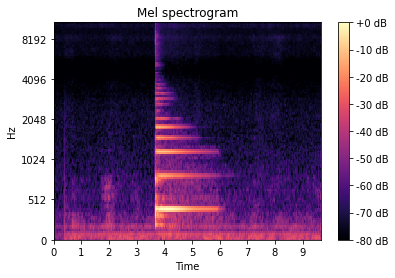

In [ ]:
fig, ax = plt.subplots()
M = librosa.feature.melspectrogram(y=new_wav, sr=sample_rate)
M_db = librosa.power_to_db(M, ref=np.max)
img = librosa.display.specshow(M_db, y_axis='mel', x_axis='time', ax=ax)
ax.set(title='Mel spectrogram')
fig.colorbar(img, ax=ax, format="%+2.f dB")

##### MFCCs Linear

(20, 417)


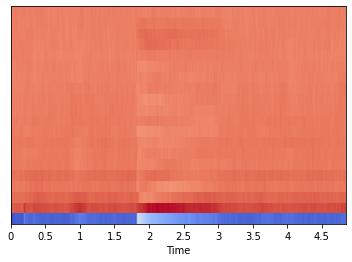

In [ ]:
mfccs = librosa.feature.mfcc(new_wav, sr=sample_rate)
print(mfccs.shape)
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

##### MFCCs Mel

# C (high) Analysis

### Raw Recording

[0.03482993 1.10294785]


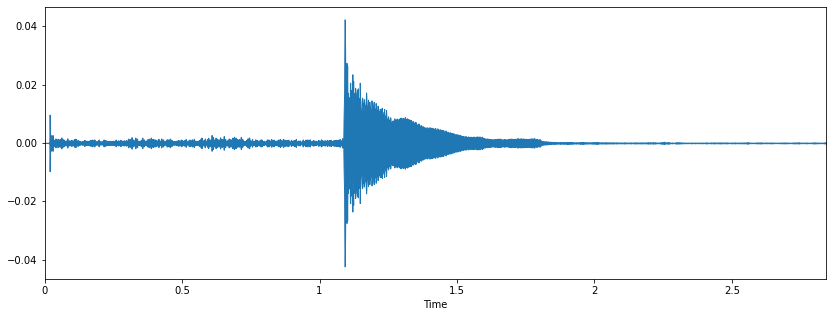

In [47]:
AUDIO_FILE = '/content/drive/MyDrive/Notes/C (high)/1648661944091.wav'
samples, sample_rate = librosa.load(AUDIO_FILE, sr=None)
print(librosa.onset.onset_detect(samples, sr=sample_rate, units='time'))

plt.figure(figsize=(14, 5))
librosa.display.waveplot(samples, sr=sample_rate)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  """


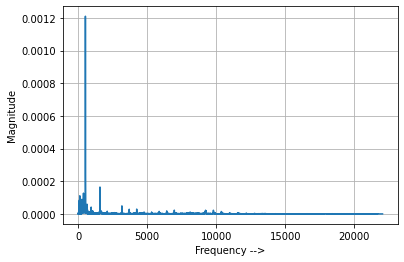

In [16]:
fft_plot(samples, sample_rate)

##### Linear Spectrogram

In [48]:
Audio(AUDIO_FILE)

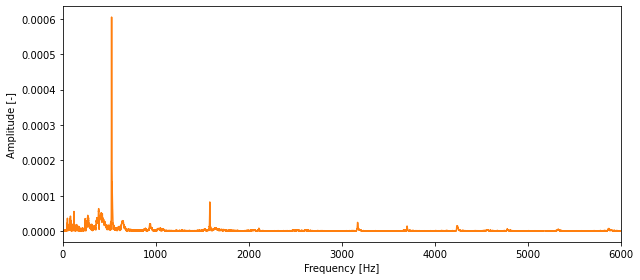

In [50]:
plt.figure(figsize=(9, 4))

plt.magnitude_spectrum(samples, Fs=sample_rate, color='C1', window=mlab.window_none)
plt.xlim(0, 6000)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [-]')
plt.tight_layout()
plt.show()

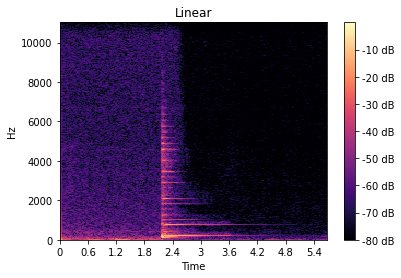

In [ ]:
D = librosa.stft(samples)  # STFT of samples
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax)
ax.set(title='Linear')
fig.colorbar(img, ax=ax, format="%+2.f dB")

##### Log Scale Spectrogram

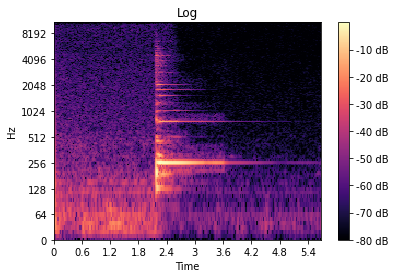

In [ ]:
D = librosa.stft(samples)  # STFT of samples
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
ax.set(title='Log')
fig.colorbar(img, ax=ax, format="%+2.f dB")

##### Mel Spectrogram

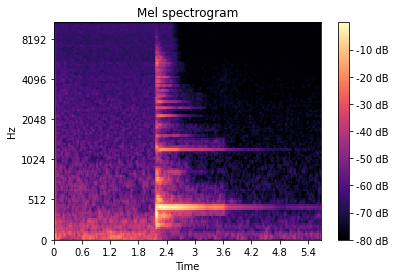

In [ ]:
fig, ax = plt.subplots()
M = librosa.feature.melspectrogram(y=samples, sr=sample_rate)
M_db = librosa.power_to_db(M, ref=np.max)
img = librosa.display.specshow(M_db, y_axis='mel', x_axis='time', ax=ax)
ax.set(title='Mel spectrogram')
fig.colorbar(img, ax=ax, format="%+2.f dB")

##### MFCCs Linear

(20, 245)


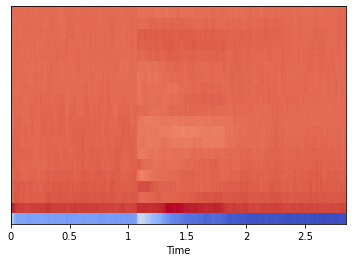

In [ ]:
mfccs = librosa.feature.mfcc(samples, sr=sample_rate)
print(mfccs.shape)
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

##### MFCCs Mel

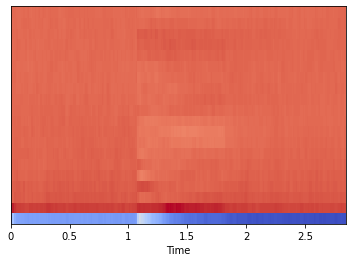

In [ ]:
mfccs2 = librosa.feature.mfcc(S=M_db)
librosa.display.specshow(mfccs2, sr=sample_rate, x_axis='time')

### Shorten Recording based on Decibels

[1.09133787]


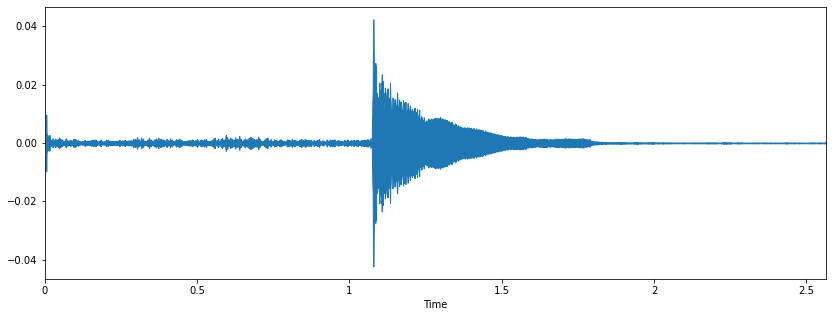

In [ ]:
clips = librosa.effects.split(samples, top_db=50, hop_length=64, frame_length=256)
#print(clips)
wav_data = []
for c in clips:
    #print(c)
    data = samples[c[0]: c[1]]
    wav_data.extend(data)
new_wav = arr = np.array(wav_data)
print(librosa.onset.onset_detect(new_wav, sr=sample_rate, units='time'))

plt.figure(figsize=(14, 5))
librosa.display.waveplot(new_wav, sr=sample_rate)

##### Linear Spectrogram

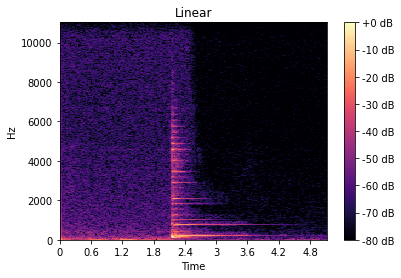

In [ ]:
D = librosa.stft(new_wav)  # STFT of samples
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax)
ax.set(title='Linear')
fig.colorbar(img, ax=ax, format="%+2.f dB")

##### Log Scale Spectrogram

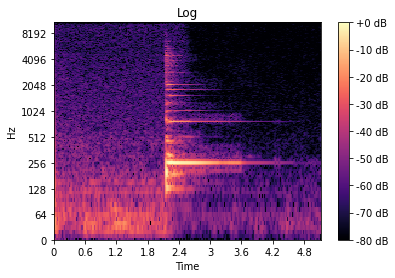

In [ ]:
D = librosa.stft(new_wav)  # STFT of samples
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
ax.set(title='Log')
fig.colorbar(img, ax=ax, format="%+2.f dB")

##### Mel Spectrogram

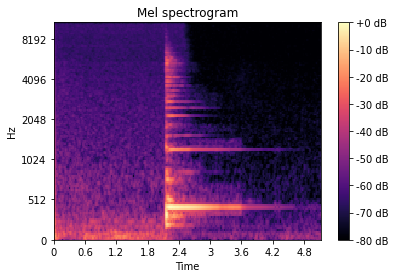

In [ ]:
fig, ax = plt.subplots()
M = librosa.feature.melspectrogram(y=new_wav, sr=sample_rate)
M_db = librosa.power_to_db(M, ref=np.max)
img = librosa.display.specshow(M_db, y_axis='mel', x_axis='time', ax=ax)
ax.set(title='Mel spectrogram')
fig.colorbar(img, ax=ax, format="%+2.f dB")

##### MFCCs Linear

(20, 221)


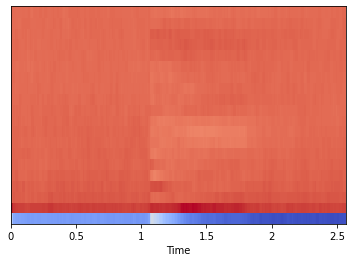

In [ ]:
mfccs = librosa.feature.mfcc(new_wav, sr=sample_rate)
print(mfccs.shape)
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

##### MFCCs Mel

# Background Analysis

### Raw Recording

[0.09287982 0.34829932 0.48761905 1.021678   1.17260771 1.4860771
 1.60217687 1.92725624 1.97369615 2.31038549]


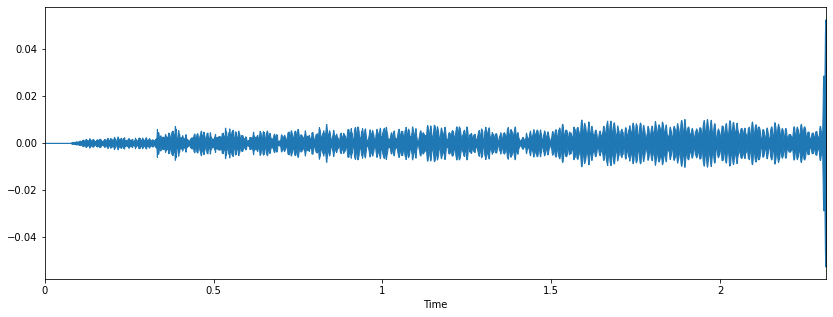

In [51]:
AUDIO_FILE = '/content/drive/MyDrive/Background/1648662529079.wav'
samples, sample_rate = librosa.load(AUDIO_FILE, sr=None)
print(librosa.onset.onset_detect(samples, sr=sample_rate, units='time'))

plt.figure(figsize=(14, 5))
librosa.display.waveplot(samples, sr=sample_rate)

##### Linear Spectrogram

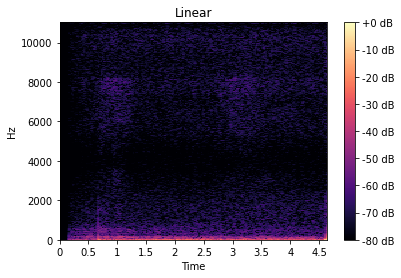

In [52]:
D = librosa.stft(samples)  # STFT of samples
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax)
ax.set(title='Linear')
fig.colorbar(img, ax=ax, format="%+2.f dB")

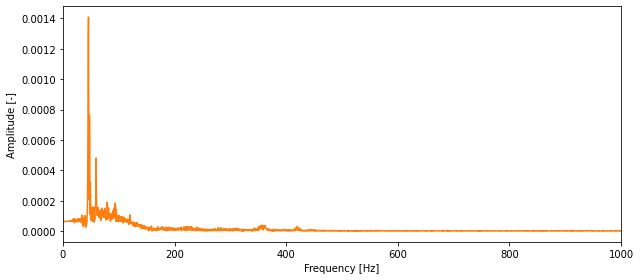

In [54]:
plt.figure(figsize=(9, 4))

plt.magnitude_spectrum(samples, Fs=sample_rate, color='C1', window=mlab.window_none)
plt.xlim(0, 1000)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [-]')
plt.tight_layout()
plt.show()

##### Log Scale Spectrogram

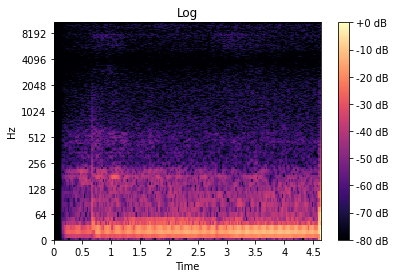

In [ ]:
D = librosa.stft(samples)  # STFT of samples
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
ax.set(title='Log')
fig.colorbar(img, ax=ax, format="%+2.f dB")

##### Mel Spectrogram

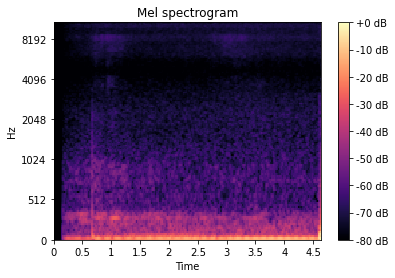

In [ ]:
fig, ax = plt.subplots()
M = librosa.feature.melspectrogram(y=samples, sr=sample_rate)
M_db = librosa.power_to_db(M, ref=np.max)
img = librosa.display.specshow(M_db, y_axis='mel', x_axis='time', ax=ax)
ax.set(title='Mel spectrogram')
fig.colorbar(img, ax=ax, format="%+2.f dB")

##### MFCCs Linear

(20, 200)


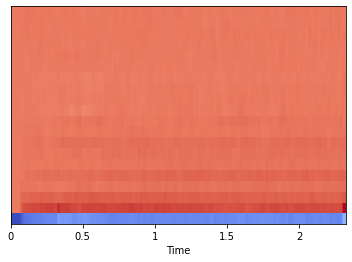

In [ ]:
mfccs = librosa.feature.mfcc(samples, sr=sample_rate)
print(mfccs.shape)
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

##### MFCCs Mel

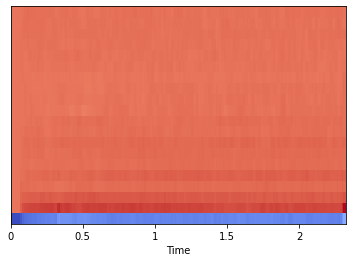

In [ ]:
mfccs2 = librosa.feature.mfcc(S=M_db)
librosa.display.specshow(mfccs2, sr=sample_rate, x_axis='time')

### Shorten Recording based on Decibels

[0.03482993 0.26702948 0.40634921 0.52244898 0.7662585  0.84752834
 0.88235828 0.94040816 1.09133787 1.25387755 1.33514739 1.40480726
 1.52090703 1.60217687 1.7414966  1.84598639 1.90403628 2.04335601
 2.22911565]


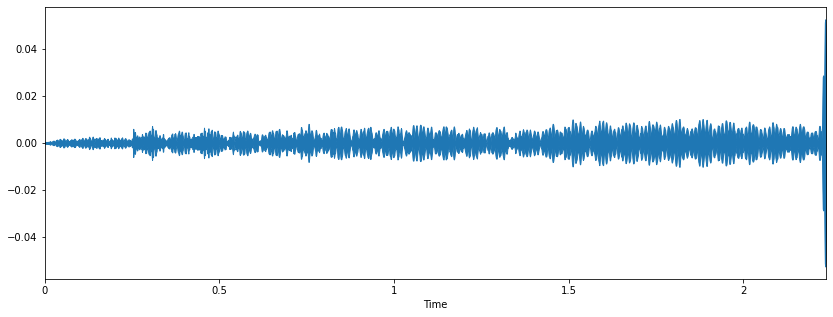

In [ ]:
clips = librosa.effects.split(samples, top_db=50, hop_length=64, frame_length=256)
#print(clips)
wav_data = []
for c in clips:
    #print(c)
    data = samples[c[0]: c[1]]
    wav_data.extend(data)
new_wav = arr = np.array(wav_data)
print(librosa.onset.onset_detect(new_wav, sr=sample_rate, units='time'))

plt.figure(figsize=(14, 5))
librosa.display.waveplot(new_wav, sr=sample_rate)

##### Linear Spectrogram

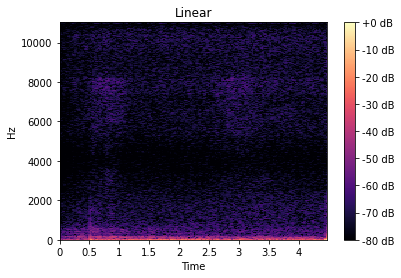

In [ ]:
D = librosa.stft(new_wav)  # STFT of samples
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax)
ax.set(title='Linear')
fig.colorbar(img, ax=ax, format="%+2.f dB")

##### Log Scale Spectrogram

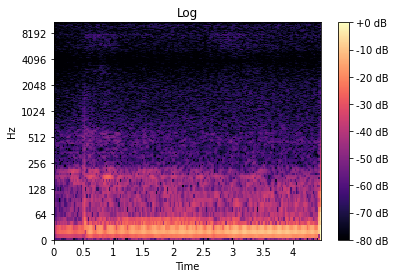

In [ ]:
D = librosa.stft(new_wav)  # STFT of samples
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
ax.set(title='Log')
fig.colorbar(img, ax=ax, format="%+2.f dB")

##### Mel Spectrogram

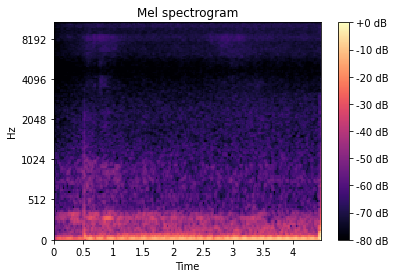

In [ ]:
fig, ax = plt.subplots()
M = librosa.feature.melspectrogram(y=new_wav, sr=sample_rate)
M_db = librosa.power_to_db(M, ref=np.max)
img = librosa.display.specshow(M_db, y_axis='mel', x_axis='time', ax=ax)
ax.set(title='Mel spectrogram')
fig.colorbar(img, ax=ax, format="%+2.f dB")

##### MFCCs Linear

(20, 193)


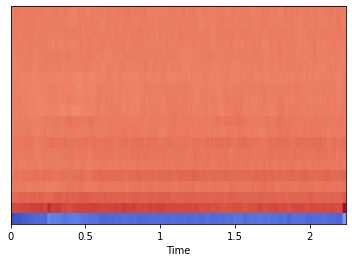

In [ ]:
mfccs = librosa.feature.mfcc(new_wav, sr=sample_rate)
print(mfccs.shape)
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')